<a href="https://colab.research.google.com/github/akashthakur441/Face-Mask-Detection-using-CNN-DL-project-/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask Detection using CNN

In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
#api to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 154M/163M [00:00<00:00, 163MB/s]
100% 163M/163M [00:01<00:00, 166MB/s]


In [4]:
#extracting the copressed Dataset
from zipfile import ZipFile
dataset= '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**`Importing  the Dependencies`**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_515.jpg', 'with_mask_1432.jpg', 'with_mask_3104.jpg', 'with_mask_656.jpg', 'with_mask_1094.jpg']
['with_mask_1788.jpg', 'with_mask_2404.jpg', 'with_mask_2894.jpg', 'with_mask_3438.jpg', 'with_mask_339.jpg']


In [8]:

without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(with_mask_files[-5:])

['without_mask_2793.jpg', 'without_mask_1590.jpg', 'without_mask_2430.jpg', 'without_mask_1606.jpg', 'without_mask_874.jpg']
['with_mask_1788.jpg', 'with_mask_2404.jpg', 'with_mask_2894.jpg', 'with_mask_3438.jpg', 'with_mask_339.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask-> 1

without mask ->0

In [10]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Display the Images**

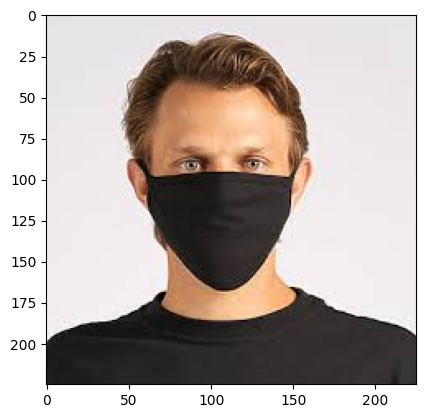

In [14]:
#displaying with mask ikmages
img= mpimg.imread('/content/data/with_mask/with_mask_852.jpg')
imgplot=plt.imshow(img)
plt.show()

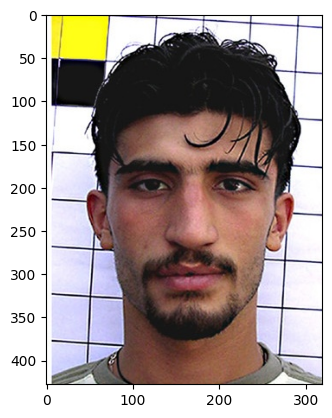

In [15]:
#displaying without mask ikmages
img= mpimg.imread('/content/data/without_mask/without_mask_3597.jpg')
imgplot=plt.imshow(img)
plt.show()

**image Processing**

1.Resize the images.

2.convert the images to numpy arrays.


In [16]:
#convert images to numpy arrays
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'
data=[]
for img_file in without_mask_files:
  image=Image.open(without_mask_path +img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

3828

array([[[42, 55, 90],
        [42, 55, 90],
        [42, 55, 90],
        ...,
        [40, 53, 87],
        [40, 53, 87],
        [39, 52, 86]],

       [[42, 55, 90],
        [42, 55, 90],
        [42, 55, 90],
        ...,
        [40, 53, 87],
        [40, 53, 87],
        [39, 52, 86]],

       [[42, 55, 90],
        [42, 55, 90],
        [42, 55, 90],
        ...,
        [40, 53, 87],
        [40, 53, 87],
        [40, 53, 87]],

       ...,

       [[17, 17, 19],
        [17, 17, 19],
        [17, 17, 19],
        ...,
        [35, 36, 38],
        [36, 37, 39],
        [37, 38, 40]],

       [[17, 17, 19],
        [17, 17, 19],
        [17, 17, 19],
        ...,
        [34, 35, 37],
        [35, 36, 38],
        [36, 37, 39]],

       [[16, 16, 18],
        [16, 16, 18],
        [16, 16, 18],
        ...,
        [34, 35, 37],
        [35, 36, 38],
        [35, 36, 38]]], dtype=uint8)
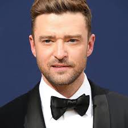

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#converting image list and label list to numpy arrays
X= np.array(data)
Y=np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(3828, 128, 128, 3)
(7553,)


In [26]:

print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split


In [29]:
Y = Y[:X.shape[0]]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(3828, 128, 128, 3) (3062, 128, 128, 3) (766, 128, 128, 3)


In [31]:
print(X.shape, X_train.shape, X_test.shape)

(3828, 128, 128, 3) (3062, 128, 128, 3) (766, 128, 128, 3)


In [32]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[211, 211, 211],
        [212, 212, 212],
        [213, 213, 213],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [180, 180, 180]],

       [[211, 211, 211],
        [212, 212, 212],
        [213, 213, 213],
        ...,
        [182, 182, 182],
        [181, 181, 181],
        [181, 181, 181]],

       [[211, 211, 211],
        [212, 212, 212],
        [213, 213, 213],
        ...,
        [183, 183, 183],
        [182, 182, 182],
        [182, 182, 182]],

       ...,

       [[143, 142, 140],
        [142, 141, 139],
        [141, 140, 138],
        ...,
        [  8,  49, 118],
        [  7,  43, 116],
        [  8,  42, 116]],

       [[142, 141, 139],
        [141, 140, 138],
        [139, 138, 136],
        ...,
        [ 10,  44, 109],
        [  9,  38,  99],
        [ 16,  43, 104]],

       [[141, 140, 138],
        [140, 139, 137],
        [138, 137, 135],
        ...,
        [ 13,  45, 109],
        [ 24,  49, 109],
        [ 50,  75, 132]]], dtype=uint8)
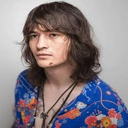

In [33]:
X_train[0]

In [34]:
X_train_scaled[0]

array([[[0.82745098, 0.82745098, 0.82745098],
        [0.83137255, 0.83137255, 0.83137255],
        [0.83529412, 0.83529412, 0.83529412],
        ...,
        [0.70980392, 0.70980392, 0.70980392],
        [0.70980392, 0.70980392, 0.70980392],
        [0.70588235, 0.70588235, 0.70588235]],

       [[0.82745098, 0.82745098, 0.82745098],
        [0.83137255, 0.83137255, 0.83137255],
        [0.83529412, 0.83529412, 0.83529412],
        ...,
        [0.71372549, 0.71372549, 0.71372549],
        [0.70980392, 0.70980392, 0.70980392],
        [0.70980392, 0.70980392, 0.70980392]],

       [[0.82745098, 0.82745098, 0.82745098],
        [0.83137255, 0.83137255, 0.83137255],
        [0.83529412, 0.83529412, 0.83529412],
        ...,
        [0.71764706, 0.71764706, 0.71764706],
        [0.71372549, 0.71372549, 0.71372549],
        [0.71372549, 0.71372549, 0.71372549]],

       ...,

       [[0.56078431, 0.55686275, 0.54901961],
        [0.55686275, 0.55294118, 0.54509804],
        [0.55294118, 0

**Building a Convolutional Neural Networks (CNN)**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 79s 884ms/step - acc: 0.9318 - loss: 0.3181 - val_acc: 0.9577 - val_loss: 0.1823
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 80s 915ms/step - acc: 0.9775 - loss: 0.1253 - val_acc: 0.9577 - val_loss: 0.1852
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 80s 889ms/step - acc: 0.9756 - loss: 0.1421 - val_acc: 0.9577 - val_loss: 0.2579
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 80s 861ms/step - acc: 0.9766 - loss: 0.1425 - val_acc: 0.9577 - val_loss: 0.1898
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 79s 838ms/step - acc: 0.9765 - loss: 0.1542 - val_acc: 0.9577 - val_loss: 0.3574


**Model Evaluation**

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - acc: 0.9711 - loss: 0.2074
Test Accuracy = 0.9699738621711731


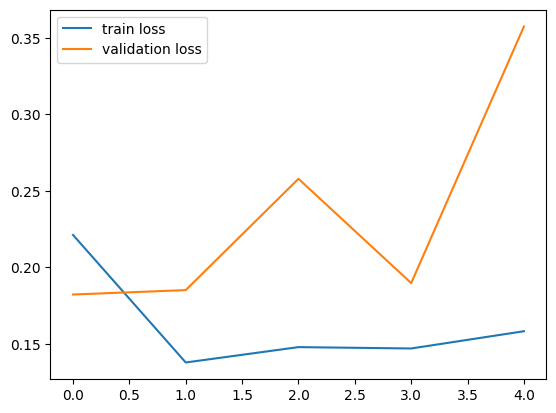

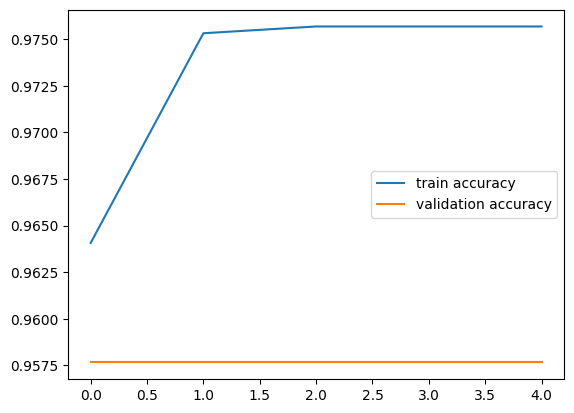

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with mask.jpg


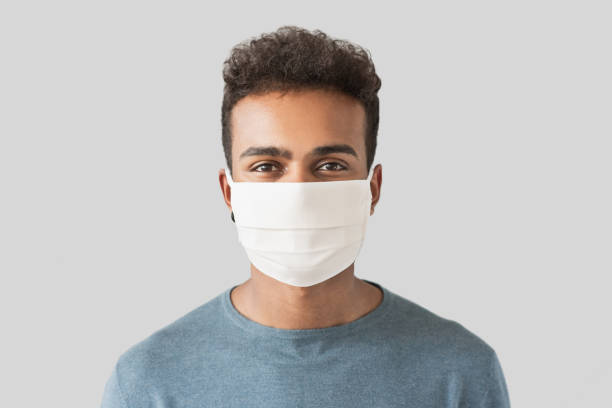

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.00218132 0.99993837]]
1
The person in the image is wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without mask (1).png


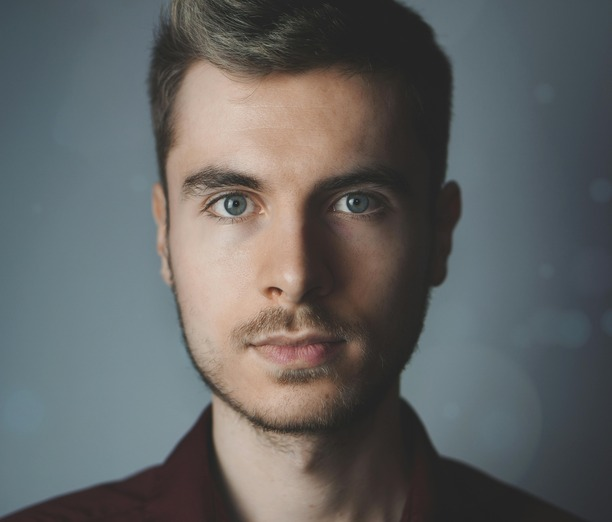

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.00489837 0.99974775]]
1
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')